# Data Visualization with Matplotlib

Data visualization is a tool to help researchers identify patterns in data as well as to convey findings to a public audience. Being able to convey data and findings in a universal way can help others learn from it without being as familiar with the data. 

Matplotlib is an open-source Python library for generating data visualizations. With it, developers can generate 2D visualizations in a variety of forms that range from line plots, scatter plots, histograms, bar charts, and more. Because each plot presents data in a different way, it is often useful to try out different types of plots before settling on one that works best for a given data set. Keep in mind that visualization concerns not only data but design principles as well.

## Data Visualization Examples

* <a href="https://www.economist.com/gallery/2015-03-06/20150307-universities">American universities, selectivity and returns (The Economist)</a>
* <a href="http://benschmidt.org/profGender/">Gendered Language in Teacher Reviews (Ben Schmidt)</a>
* <a href="http://blog.quantifyingkissinger.com/category/visualizations/line-and-bar-graphs/">“Everything on paper will be used against me”: Quantifying Kissinger (Micki Kaufman)</a>
* <a href="http://www.tobacco-analytics.org/frequencies">Tobacco Analytics (Stephan Risi, Robert Proctor)</a>
* <a href="https://caterina.io/bubbleTest/index.html">Lyrical Mysticism (Lisa Tagliaferri)</a>

<img src="https://www.economist.com/sites/default/files/imagecache/original-size/20150307_woc368m.png">

In [1]:
import matplotlib.pyplot as plt

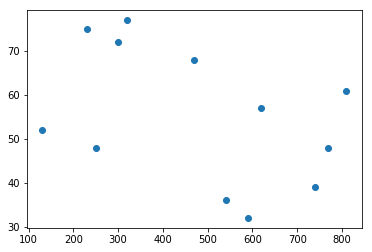

In [2]:
X = [590, 540, 740, 130, 810, 300, 320, 230, 470, 620, 770, 250]
Y = [32, 36, 39, 52, 61, 72, 77, 75, 68, 57, 48, 48]

plt.scatter(X, Y)
plt.show()

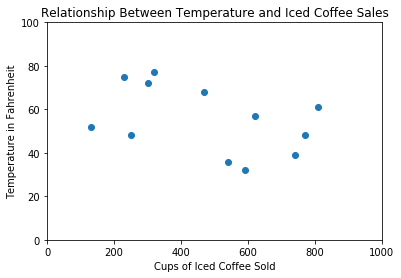

In [3]:
plt.title('Relationship Between Temperature and Iced Coffee Sales')
plt.xlabel('Cups of Iced Coffee Sold')
plt.ylabel('Temperature in Fahrenheit')

X = [590, 540, 740, 130, 810, 300, 320, 230, 470, 620, 770, 250]
Y = [32, 36, 39, 52, 61, 72, 77, 75, 68, 57, 48, 48]

plt.xlim(0,1000)
plt.ylim(0,100)

plt.scatter(X, Y)
plt.show()

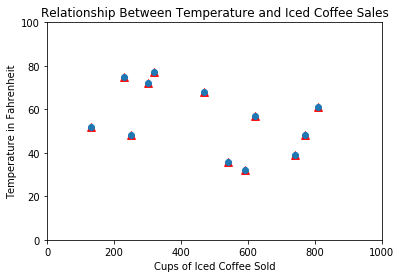

In [4]:
plt.title('Relationship Between Temperature and Iced Coffee Sales')
plt.xlabel('Cups of Iced Coffee Sold')
plt.ylabel('Temperature in Fahrenheit')

plt.scatter(X, Y, s=60, c='red', marker='^')
plt.rcParams.update({"figure.figsize": (8, 6)})
font = {'weight' : 'bold', 'size' : 12}
plt.rc('font', **font)

X = [590, 540, 740, 130, 810, 300, 320, 230, 470, 620, 770, 250]
Y = [32, 36, 39, 52, 61, 72, 77, 75, 68, 57, 48, 48]

plt.xlim(0,1000)
plt.ylim(0,100)

plt.scatter(X, Y)
plt.show()

In [5]:
import operator


def word_freq(word, filename):
    doc = {}

    for line in open(filename):

        # Assume each word is separated by a space
        split = line.split(' ')
        for entry in split:
            if (doc.__contains__(entry)):
                doc[entry] = int(doc.get(entry)) + 1
            else:
                doc[entry] = 1

    if (word not in doc):
        sys.stderr.write("Error: " + word + " does not appear in " + filename)
        sys.exit(1)

    sorted_doc = (sorted(doc.items(), key=operator.itemgetter(1)))[::-1]
    just_the_occur = []
    just_the_rank = []
    word_rank = 0
    word_frequency = 0

    entry_num = 1
    for entry in sorted_doc:

        if (entry[0] == word):
            word_rank = entry_num
            word_frequency = entry[1]

        just_the_rank.append(entry_num)
        entry_num += 1
        just_the_occur.append(entry[1])

    plt.title("Word Frequencies in " + filename)
    plt.ylabel("Total Number of Occurrences")
    plt.xlabel("Rank of word(\"" + word + "\" is rank " + str(word_rank) + ")")
    plt.loglog(just_the_rank, just_the_occur, basex=10)
    plt.scatter(
        [word_rank],
        [word_frequency],
        color="orange",
        marker="*",
        s=100,
        label=word
    )
    plt.show()

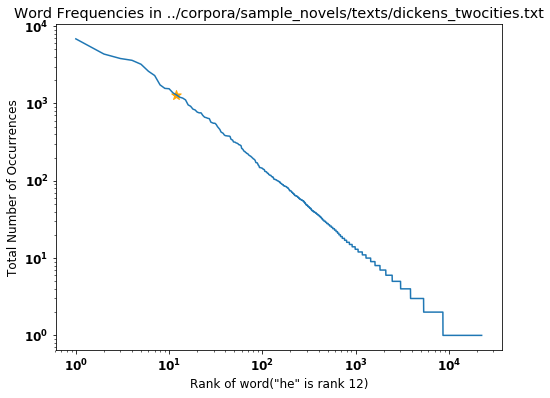

In [6]:
word_freq("he", "../corpora/sample_novels/texts/dickens_twocities.txt")

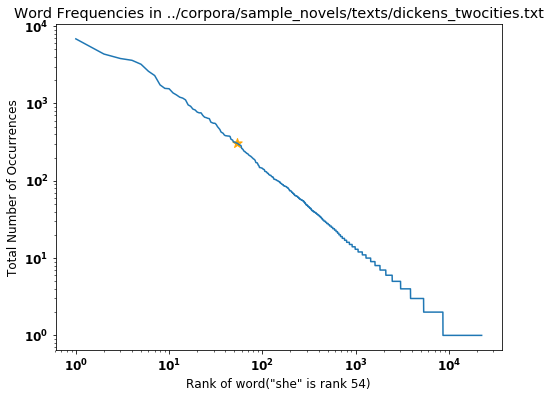

In [7]:
word_freq("she", "../corpora/sample_novels/texts/dickens_twocities.txt")

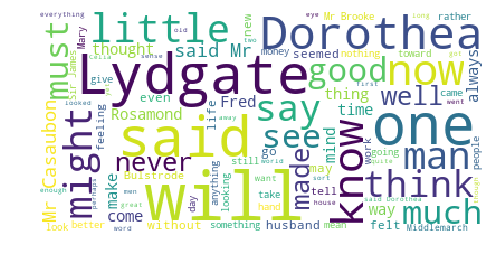

In [8]:
from os import path
from wordcloud import WordCloud


d = path.dirname('__file__')

text = open(path.join(d, '../corpora/sample_novels/texts/eliot_middlemarch.txt')).read()

wc = WordCloud(
            background_color="white",
            max_words=5000,
            max_font_size=60,
            min_font_size=6,
            random_state=80)

wc.generate(text)

plt.imshow(wc)
plt.axis("off")
plt.show()

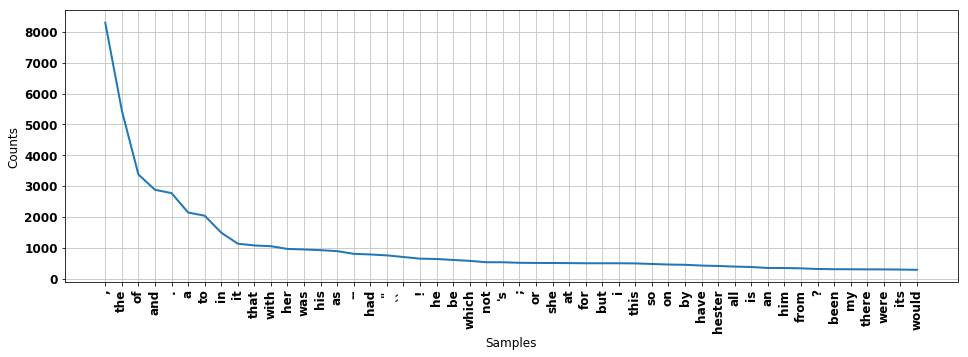

In [9]:
import numpy
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize


allwords = []

with open('../corpora/sample_novels/texts/hawthorne_scarlet.txt') as input:
    text_lines = input.readlines()

for line in text_lines:
    words = word_tokenize(line)
    for w in words:
        w = w.lower()
        allwords.append(w)

freqdist = nltk.FreqDist(allwords)
plt.figure(figsize=(16,5))
freqdist.plot(50)

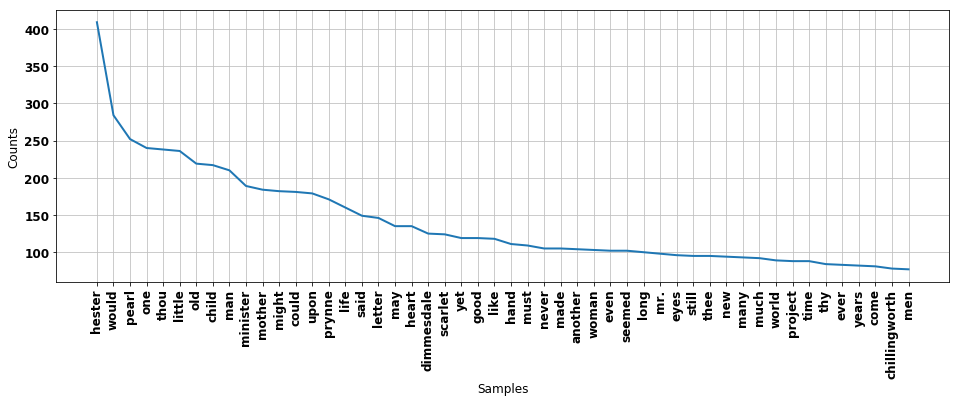

In [10]:
allwords = []

officialstopwords = stopwords.words('english')
additionalstopwords = [u"\u0027", "’", "”", "“", "'", ".", "'s", ";", "--",
                      "!", "\"", "``", "?", ",", "(", ")", ":", "1", "2", "3",
                      "b", "4", "5", "“i", "n't", "“you", "also", "c.", "''"]
allstopwords = officialstopwords + additionalstopwords

with open('../corpora/sample_novels/texts/hawthorne_scarlet.txt') as input:
    text_lines = input.readlines()

for line in text_lines:
    words = word_tokenize(line)
    for w in words:
        w = w.lower()
        if w not in allstopwords:
            allwords.append(w)

freqdist = nltk.FreqDist(allwords)
plt.figure(figsize=(16,5))
freqdist.plot(50)

## Resources

* <a href="https://matplotlib.org/users/index.html">Matplotlib User's Guide</a>
* <a href="https://matplotlib.org/gallery/index.html">Matplotlib Gallery</a>
* <a href="https://www.digitalocean.com/community/tutorials/how-to-plot-data-in-python-3-using-matplotlib">How To Plot Data in Python 3 Using Matplotlib</a>
* <a href="https://www.digitalocean.com/community/tutorials/how-to-graph-word-frequency-using-matplotlib-with-python-3">How To Graph Word Frequency Using Matplotlib with Python 3</a>
* <a href="https://www.digitalocean.com/community/tutorials/getting-started-with-data-visualization-using-javascript-and-the-d3-library">Getting Started with Data Visualization Using JavaScript and the D3 Library</a>